In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.applications import resnet50, VGG16 , InceptionV3, Xception
from tensorflow.keras.layers import Dense,Conv2D,Flatten,BatchNormalization,Dropout,MaxPooling2D,AveragePooling2D,Activation
from keras.layers import Dense, GlobalAveragePooling2D
from keras.optimizers import Nadam
import tensorflow as tf
from tensorflow import keras

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.utils import to_categorical
from keras.models import Model
import tensorflow as tf
import os
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [4]:
bx=16
train_datagen = train_datagen.flow_from_directory(
                  directory=r'./DATASET/TRAIN',
                  target_size=(300,300),
                  batch_size=bx,
                  shuffle=True,
                  class_mode='binary')

val_datagen = test_datagen.flow_from_directory(
                directory=r'./DATASET/TEST',
                target_size=(300,300),
                batch_size=bx,
                shuffle=False,
                class_mode='binary')

Found 403 images belonging to 2 classes.
Found 177 images belonging to 2 classes.


In [5]:
#base_model =  Xception(weights='xception_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False, input_shape=(300, 300, 3))

In [6]:
# model = Sequential()
# model.add(Flatten(input_shape=base_model.output_shape[1:]))
# model.add(Dense(128))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))
# model.add(Dense(1))
# model.add(Activation('sigmoid'))
# predictions = Dense(1,activation='hard_sigmoid')(x)



# model = Model(inputs=base_model.input, outputs=model(base_model.output))

In [7]:
base_model = Xception(weights='imagenet', include_top=False)
#add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(200,activation='elu')(x)
x = Dropout(0.4)(x)
x = Dense(170,activation='elu')(x)
predictions = Dense(1,activation='hard_sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [8]:
model.compile(optimizer=Nadam(lr=0.0001), 
loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
_______________________________________________________________________________________

In [10]:
# optimizers = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9, nesterov=True)
# losss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2, from_logits=True)
# model.compile(loss=losss,
#              optimizer=optimizers
#             ,metrics=['accuracy'])

# model.summary()

In [11]:


Hist=model.fit_generator(generator=train_datagen,
                    validation_data=val_datagen,
                    epochs=3
                    )



Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/3


c:\users\chaku\appdata\local\programs\python\python38\lib\site-packages\PIL\Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


26/26 [==============================] - 669s 26s/step - loss: 0.3135 - accuracy: 0.8536 - val_loss: 0.0153 - val_accuracy: 0.9944
Epoch 2/3
26/26 [==============================] - 601s 23s/step - loss: 0.0491 - accuracy: 0.9826 - val_loss: 0.0097 - val_accuracy: 0.9944
Epoch 3/3
26/26 [==============================] - 484s 19s/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 1.0000


In [12]:
model.save("Yoga_Detection1.hdf5")

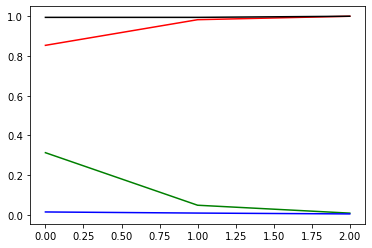

In [13]:


plt.figure(0)
plt.plot(Hist.history['loss'],'g')
plt.plot(Hist.history['val_loss'],'b')
plt.plot(Hist.history['accuracy'],'r')
plt.plot(Hist.history['val_accuracy'],'black')
plt.show()



In [20]:
img = keras.preprocessing.image.load_img(
    "test4.jpg", target_size=(300,300)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
preds = np.argmax(predictions, axis=1)
score = preds[0]
print(score)
# print(
#     "This image is %.2f percent downdog and %.2f percent goddess."
#     % (100 * (1 - score), 100 * score)
# )

0
